# Experimentación - EvolveGCN



## 1. Obtención de datos



In [5]:

import torch
import torch.nn.functional as F
import pandas as pd
import seaborn as sns
import networkx as nx
sns.set_palette("coolwarm_r")
import matplotlib.pyplot as plt
import numpy as np

from torch_geometric.data import Data, Dataset
from torch_geometric.nn import GCNConv
import itertools
import os, sys

path = os.getcwd()

sys.path.insert(1, "/".join(path.split("/")[0:-1]))

from utils import powergrid


from utils import pygt_loader

try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterable):
        return iterable
import os
import torch

from utils.models import EvolveGCNModel
from utils.trainer import  TrainerEvolveGCN
from utils.utils_graph import *
dtype = torch.float
device = torch.device("cpu")

In [3]:
#folder_path = "/home/TFM/code_dataset2/datos/Natural Oscillation"
folder_path = "/Users/maguado/Documents/UGR/Master/TFM/datos_2/Natural Oscillation"

In [4]:
loader = powergrid.PowerGridDatasetLoader(folder_path, problem="classification_type")
_,_,_ =loader.process()
limit = 300
dataset_full, situations_each = loader.get_dataset()
target_names = loader.target_names

Processing dataset...
Processing:  row_307
Node:  0  not included, including...
Node:  1  not included, including...
Node:  2  not included, including...
Node:  3  not included, including...
Node:  4  not included, including...
Node:  5  not included, including...
Node:  6  not included, including...
Node:  7  not included, including...
Node:  8  not included, including...
Node:  9  not included, including...
Node:  10  not included, including...
Node:  11  not included, including...
Node:  12  not included, including...
Node:  13  not included, including...
Node:  14  not included, including...
Node:  15  not included, including...
Node:  16  not included, including...
Node:  17  not included, including...
Node:  18  not included, including...
Node:  19  not included, including...
Node:  20  not included, including...
Node:  21  not included, including...
Node:  22  not included, including...
Processing:  row_135
Processing:  row_75
Processing:  row_338
Processing:  row_81
Processing:

## Funciones auxiliares - entrenamiento

## Bucle rápido para ajustar y guardar resultados

In [11]:
from importlib import reload
import utils.models
utils.models = reload(utils.models)
from utils.models import EvolveGCNModel

In [12]:
from importlib import reload
import utils.trainer
utils.trainer = reload(utils.trainer)
from utils.trainer import TrainerEvolveGCN

In [13]:

dataloader_params = {
    "batch_size": 4,
    "data_split_ratio": [0.7, 0.15, 0.15],
    "seed": 42,
    "keep_same": True,
    "use_batch": False
}

num_early_stop = 10
num_epochs = 100
problem = "clasificacion"
n_nodes = dataset_full.features[0].shape[0]
n_target = dataset_full.targets[0].shape[0]
n_features = dataset_full[0].x.shape[1]
device = torch.device("cpu")


model = EvolveGCNModel("EvolveGCN", node_features=n_features, node_count=n_nodes,n_target=n_target, is_classification=True)
trainer = TrainerEvolveGCN(model, dataset_full, device, f"./results/{problem}", dataloader_params, is_classification = True)

losses, eval_losses, accs, precisions, recalls, f1s = trainer.train(num_epochs=num_epochs, steps=50, num_early_stop=num_early_stop, lr=0.01)
test_acc, test_precision, test_recall, test_f1, test_loss, preds, real = trainer.test()


==================== DATASET INFO ===================

Train dataset: 390
Validation dataset: 75
Test dataset: 84

==================== TRAIN INFO ===================

Epoch 1/100 | Train Loss: 1.7312 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | F1-Score: 0.0629 | LR: 0.0100 | 
Epoch 2/100 | Train Loss: 1.7442 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | F1-Score: 0.0629 | LR: 0.0100 | 
Epoch 3/100 | Train Loss: 1.7442 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | F1-Score: 0.0629 | LR: 0.0100 | 
Epoch 4/100 | Train Loss: 1.7442 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | F1-Score: 0.0629 | LR: 0.0100 | 
Epoch 5/100 | Train Loss: 1.7442 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | F1-Score: 0.0629 | LR: 0.0100 | 
Epoch 6/100 | Train Loss: 1.7442 | Eval Loss: 1.7182 | Accuracy: 0.1867 | Precision: 0.0373 | Recall: 0.2000 | 

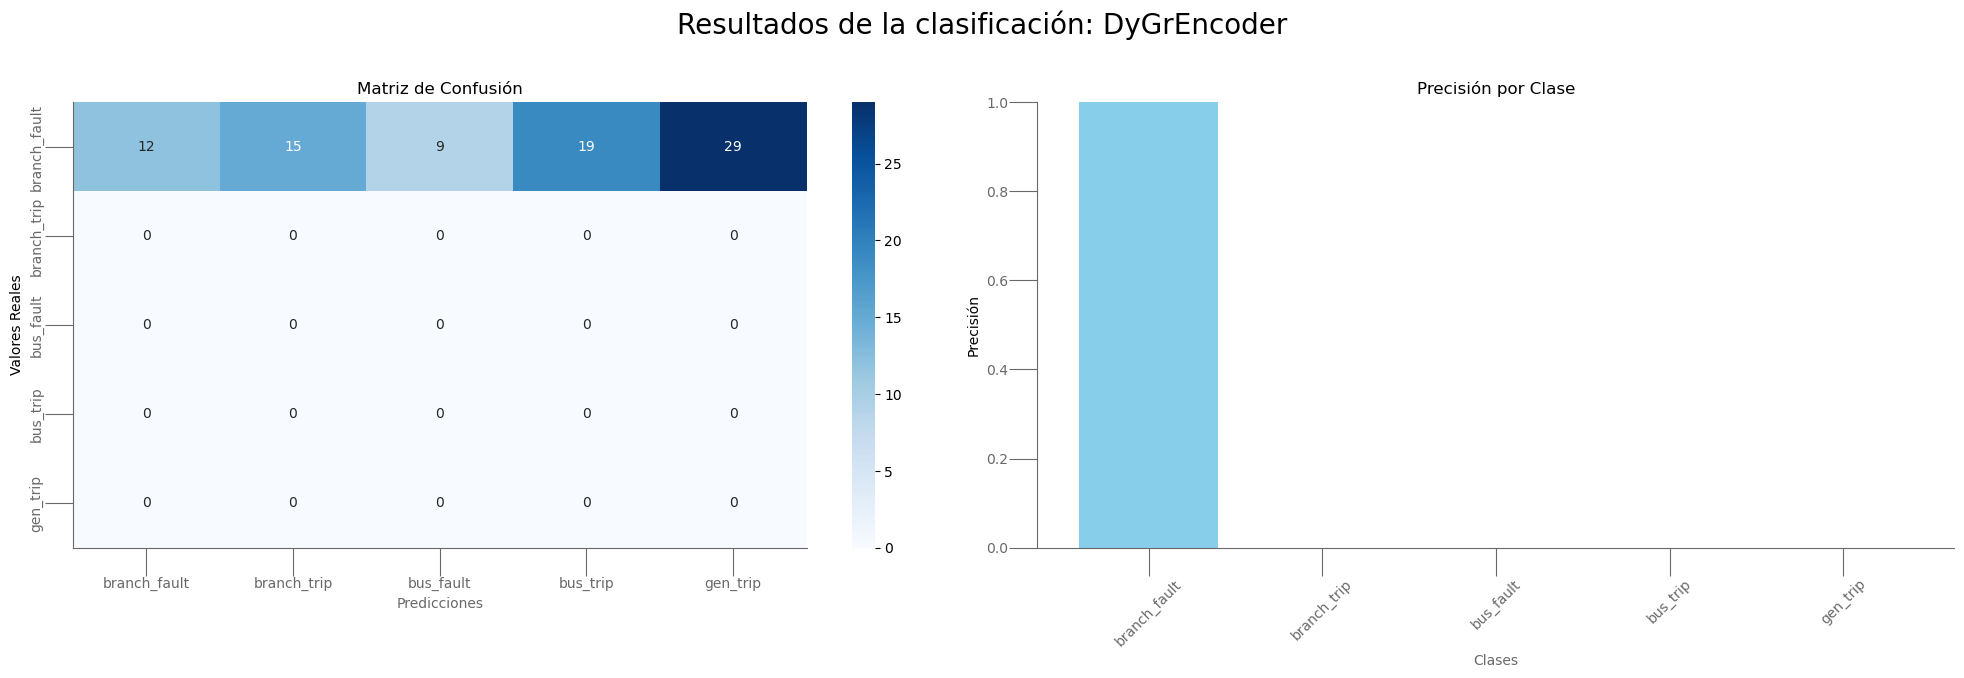

In [10]:
plot_clasificacion(real, preds, target_names, "DyGrEncoder")

In [76]:
name_model ="DyGrEncoder"
results_save_path = "../experimentos_split/results"

trainer.save_model()


==================== GUARDANDO RESULTADOS ===================

         Modelo                                             Params  \
0     MPNN_LSTM                {'Hidden Size': 64, 'Dropout': 0.2}   
1    LSTM_BATCH                  {'Hidden Size': 150, 'Layers': 1}   
2  LSTM_NOBATCH                  {'Hidden Size': 150, 'Layers': 2}   
3         AGCRN             {'hidden': 50, 'Embedding': 5, 'K': 2}   
4         AGCRN  {'aggr': 'mean', 'conv': 2, 'lstm': 1, 'lstm_o...   

                      Fichero_resultados_experimento  Loss_tst  Loss_eval  \
0  ../experimentos_split/results/clasificacion/aj...  1.348738   1.286855   
1  ../experimentos_split/results/clasificacion/aj...  1.163377   1.213140   
2  ../experimentos_split/results/clasificacion/aj...  1.160608   1.194841   
3  ../experimentos_split/results/clasificacion/aj...  1.344170   1.293829   
4  ../experimentos_split/results/clasificacion/aj...  1.278305   1.244017   

   Loss_final  Accuracy_eval  Precision_eval  Recall